In [45]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cv2 as cv
import os
from IPython.display import Video
from IPython.display import HTML
from PIL import Image,ImageDraw
import face_recognition
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import time
from tqdm.notebook import tqdm


In [27]:
train_sample_metadata = pd.read_json('Data/train_sample_videos/metadata.json').T
train_sample_metadata.head()

label  split        original
aagfhgtpmv.mp4  FAKE  train  vudstovrck.mp4
aapnvogymq.mp4  FAKE  train  jdubbvfswz.mp4
abarnvbtwb.mp4  REAL  train            None
abofeumbvv.mp4  FAKE  train  atvmxvwyns.mp4
abqwwspghj.mp4  FAKE  train  qzimuostzz.mp4

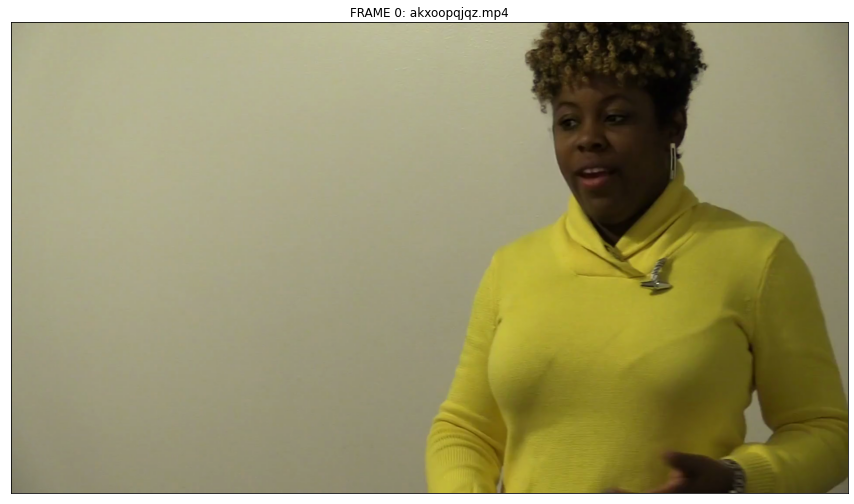

In [28]:
train_dir = 'data/train_sample_videos/'
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
# video_file = train_video_files[30]
video_file = 'data/train_sample_videos/akxoopqjqz.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)


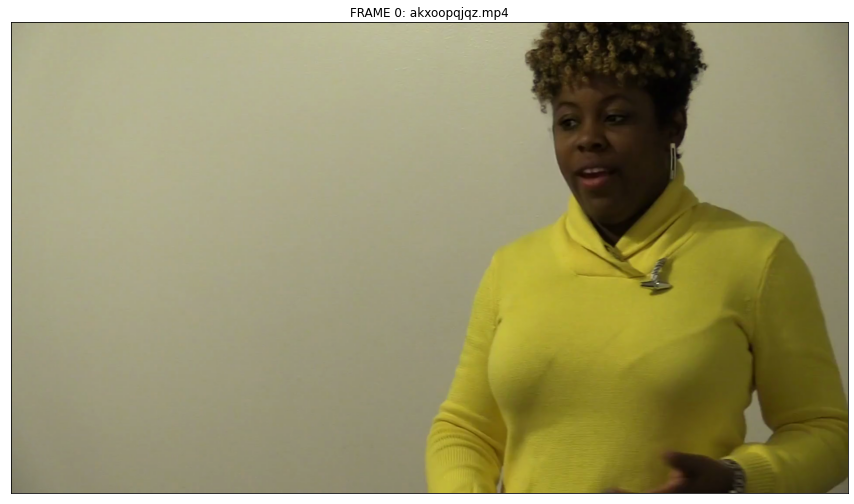

In [29]:
train_dir = 'data/train_sample_videos/'
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
# video_file = train_video_files[30]
video_file = 'data/train_sample_videos/akxoopqjqz.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 99, Left: 1168, Bottom: 420, Right: 1489


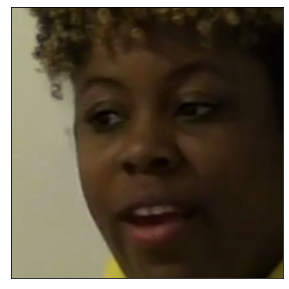

In [30]:
face_locations = face_recognition.face_locations(image)

# https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)
plt.show()

In [31]:
face_landmarks_list = face_recognition.face_landmarks(image)

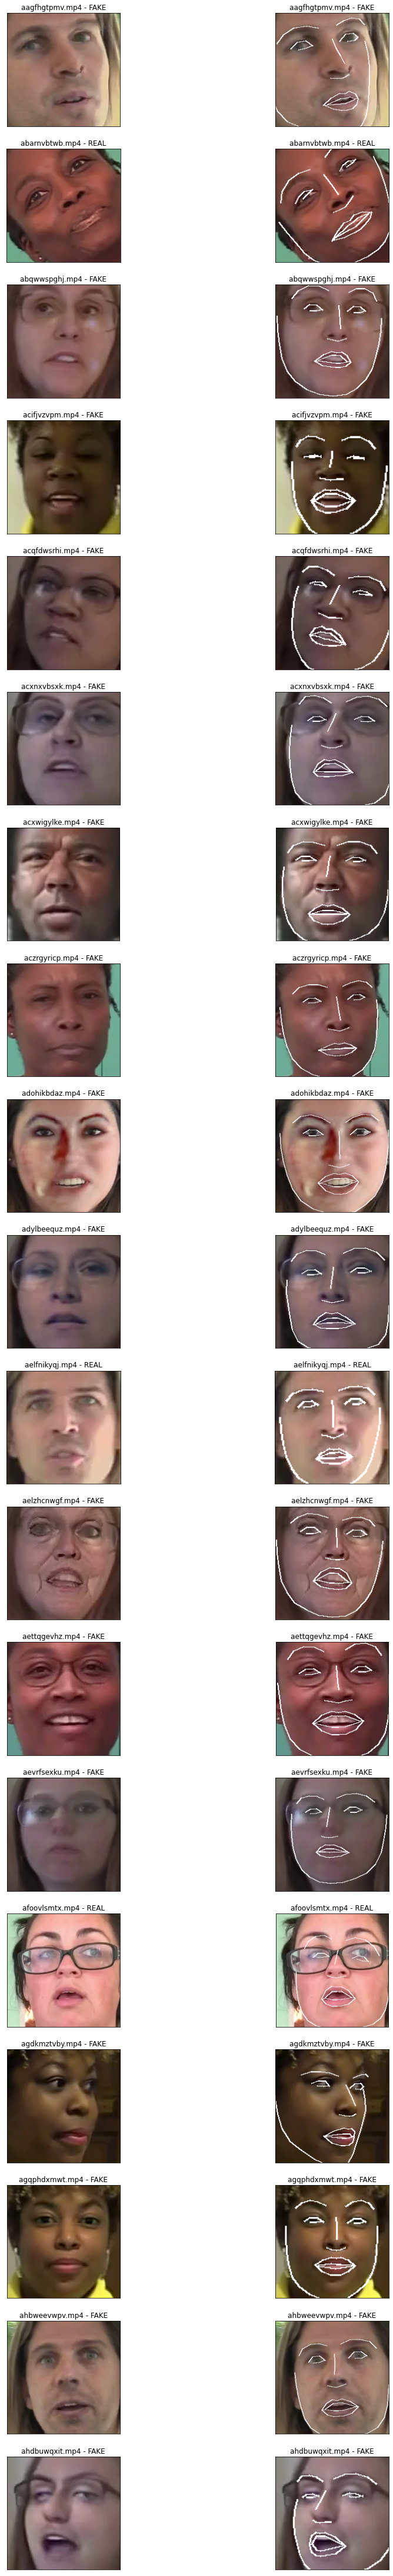

In [32]:
fig, axs = plt.subplots(19, 2, figsize=(15, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
for fn in train_sample_metadata.index[:23]:
    label = train_sample_metadata.loc[fn]['label']
    orig = train_sample_metadata.loc[fn]['label']
    video_file = f'data/train_sample_videos/{fn}'
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top:bottom, left:right]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn} - {label}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        face_landmarks = face_landmarks_list[0]
        pil_image = Image.fromarray(face_image)
        d = ImageDraw.Draw(pil_image)
        for facial_feature in face_landmarks.keys():
            d.line(face_landmarks[facial_feature], width=2)
        landmark_face_array = np.array(pil_image)
        ax2 = axs[i+1]
        ax2.imshow(landmark_face_array)
        ax2.grid(False)
        ax2.title.set_text(f'{fn} - {label}')
        ax2.xaxis.set_visible(False)
        ax2.yaxis.set_visible(False)
        i += 2
plt.grid(False)
plt.show()


The chin in this face has the following points: [(24, 49), (21, 62), (20, 75), (21, 88), (24, 100), (27, 112), (32, 122), (39, 129), (52, 131), (69, 132), (87, 131), (105, 127), (119, 118), (129, 105), (133, 90), (136, 73), (139, 55)]
The left_eyebrow in this face has the following points: [(25, 28), (30, 22), (38, 21), (46, 23), (53, 28)]
The right_eyebrow in this face has the following points: [(66, 25), (78, 20), (91, 19), (104, 23), (114, 31)]
The nose_bridge in this face has the following points: [(56, 39), (53, 46), (49, 53), (45, 60)]
The nose_tip in this face has the following points: [(42, 72), (45, 74), (50, 75), (56, 74), (63, 74)]
The left_eye in this face has the following points: [(31, 46), (35, 43), (42, 42), (49, 45), (42, 47), (35, 47)]
The right_eye in this face has the following points: [(76, 44), (84, 41), (91, 42), (99, 45), (91, 47), (84, 46)]
The top_lip in this face has the following points: [(39, 100), (41, 90), (46, 86), (50, 87), (56, 86), (67, 91), (79, 102)

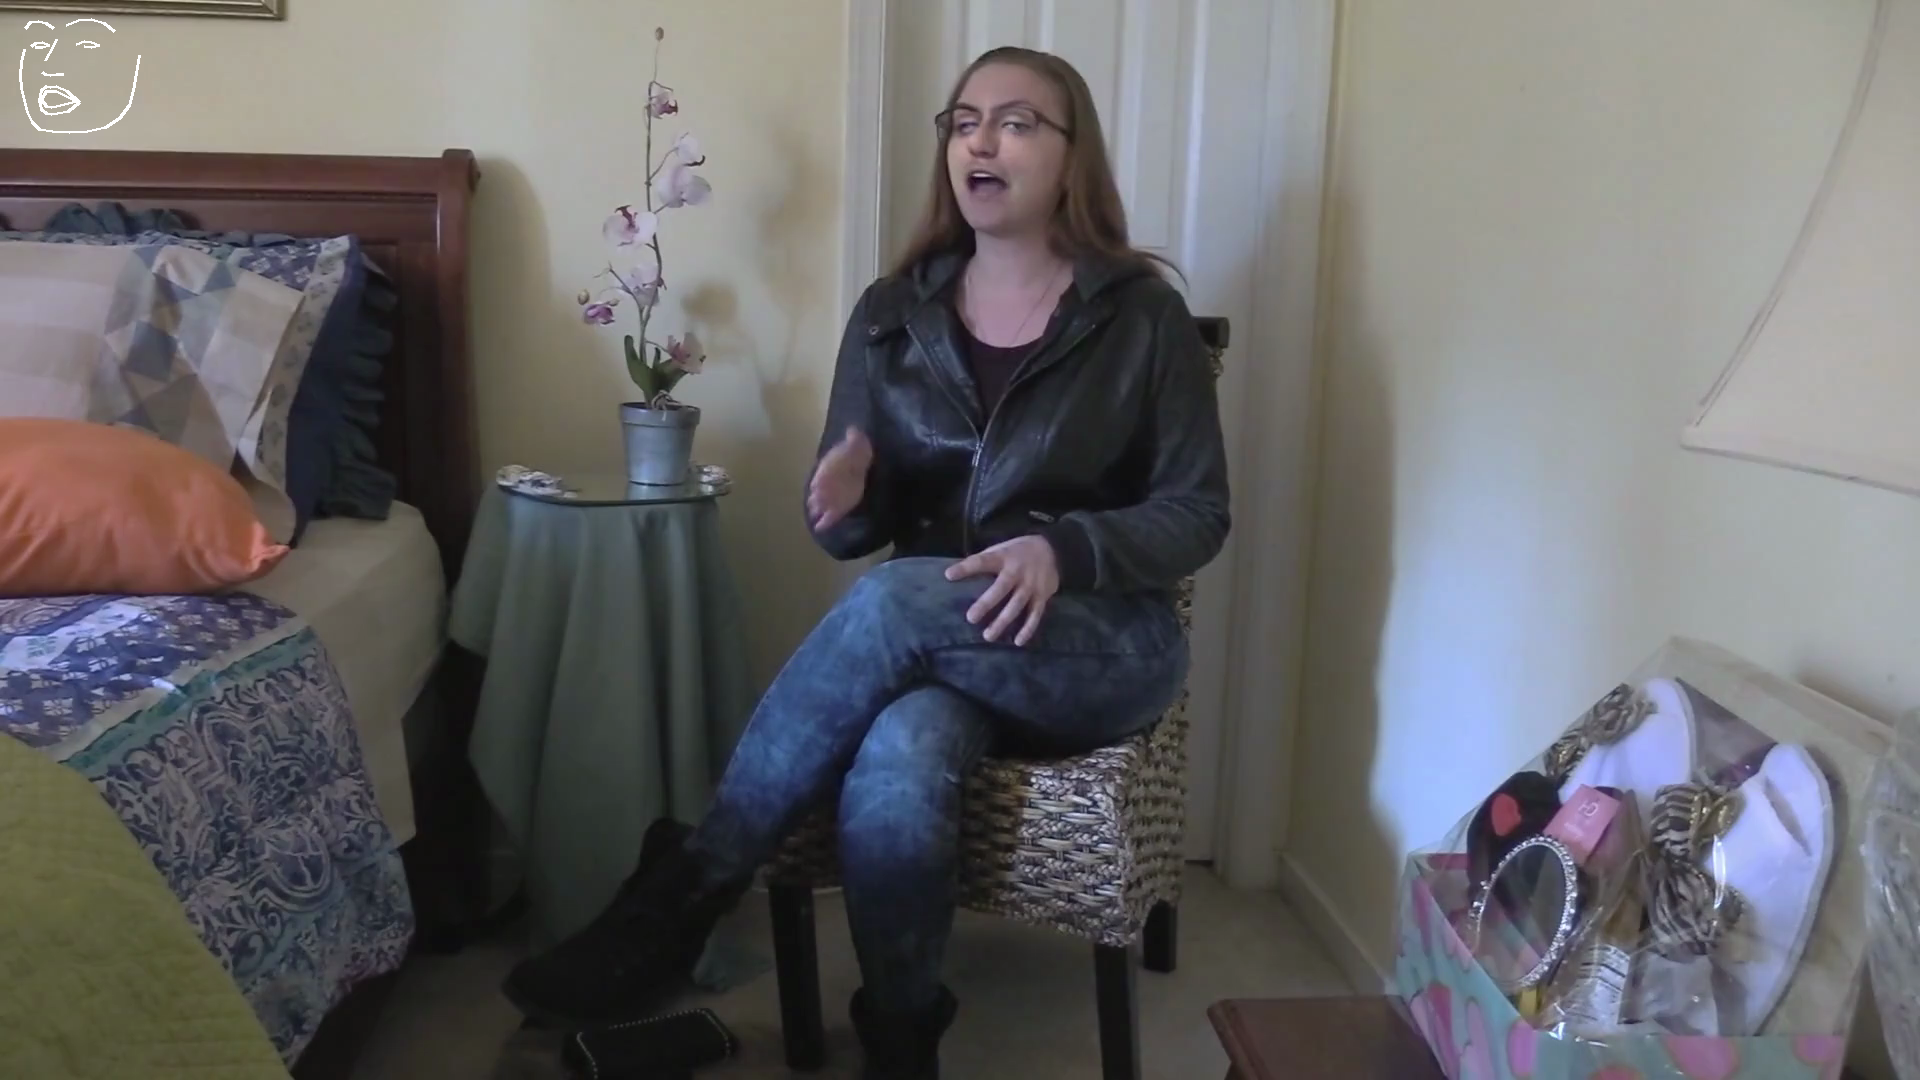

In [33]:

pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
display(pil_image)

In [39]:
video_file = 'data/train_sample_videos/akxoopqjqz.mp4'

cap = cv.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

The number of frames saved:  300


Could not find face in frame 100


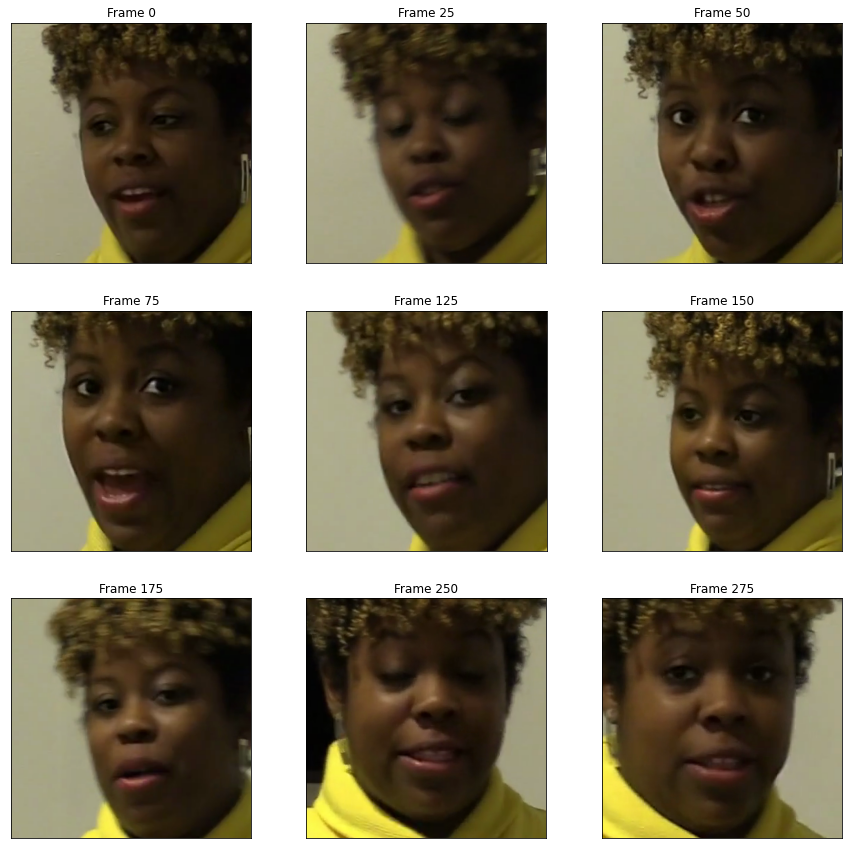

In [40]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Could not find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    image = cv.cvtColor(frame_face, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

The number of frames saved:  300


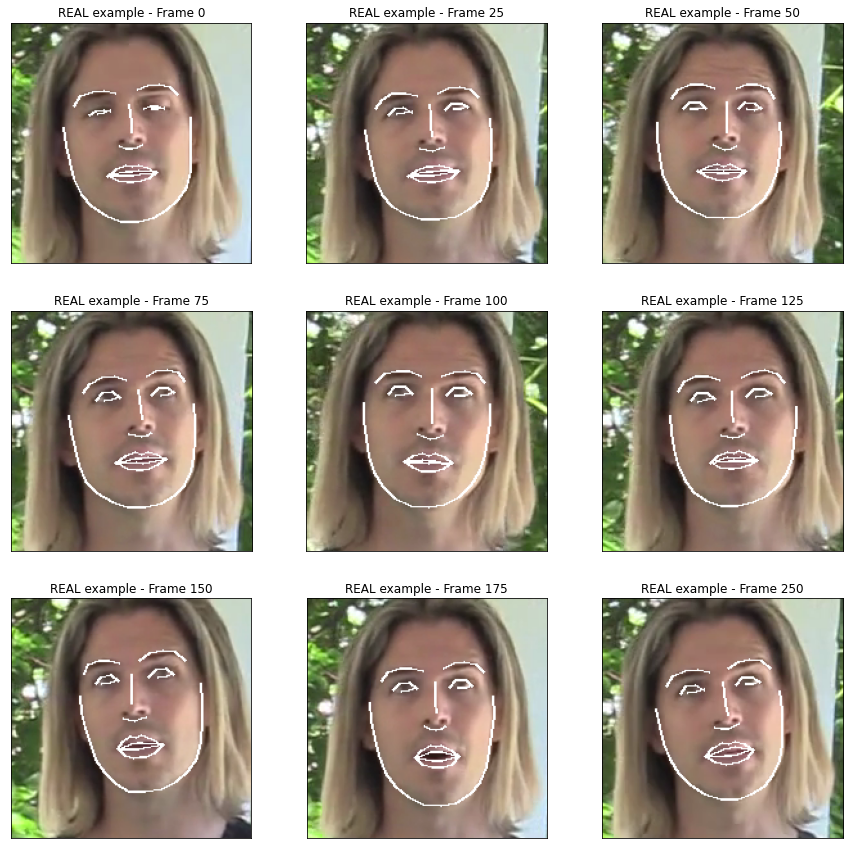

In [41]:
fn = 'ahqqqilsxt.mp4'
video_file = f'data/train_sample_videos/{fn}'

cap = cv.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()

print('The number of frames saved: ', len(frames))

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 40
for i in [0, 25, 50, 75, 100, 125, 150, 175, 250, 275]:
    frame = frames[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Count find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    face_landmarks_list = face_recognition.face_landmarks(frame_face)
    if len(face_landmarks_list) == 0:
        print(f'Could not identify face landmarks for frame {i}')
        continue
    face_landmarks = face_landmarks_list[0]
    pil_image = Image.fromarray(frame_face)
    d = ImageDraw.Draw(pil_image)
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=2, fill='white')
    landmark_face_array = np.array(pil_image)
    image = cv.cvtColor(landmark_face_array, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].grid(False)
    axes[ax_ix].set_title(f'REAL example - Frame {i}')
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    ax_ix += 1
    if ax_ix >= len(axes):
        break
plt.grid(False)
plt.show()

In [46]:
from dlib import get_frontal_face_detector
detector = get_frontal_face_detector()

def detect_dlib(detector, images):
    faces = []
    for image in images:
        image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        boxes = detector(image_gray)
        box = boxes[0]
        face = image[box.top():box.bottom(), box.left():box.right()]
        faces.append(face)
    return faces

times_dlib = []

In [52]:
sample = 'data/train_sample_videos/aagfhgtpmv.mp4'
from ipywidgets import FloatProgress

reader = cv.VideoCapture(sample)
images_1080_1920 = []
images_720_1280 = []
images_540_960 = []
for i in tqdm(range(int(reader.get(cv.CAP_PROP_FRAME_COUNT)))):
    _, image = reader.read()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images_1080_1920.append(image)
    images_720_1280.append(cv2.resize(image, (1280, 720)))
    images_540_960.append(cv2.resize(image, (960, 540)))
reader.release()

images_1080_1920 = np.stack(images_1080_1920)
images_720_1280 = np.stack(images_720_1280)
images_540_960 = np.stack(images_540_960)

print('Shapes:')
print(images_1080_1920.shape)
print(images_720_1280.shape)
print(images_540_960.shape)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [44]:
print('Detecting faces in 540x960 frames', end='')
_, elapsed = timer(detector, detect_dlib, images_540_960)
times_dlib.append(elapsed)

print('Detecting faces in 720x1280 frames', end='')
_, elapsed = timer(detector, detect_dlib, images_720_1280)
times_dlib.append(elapsed)

print('Detecting faces in 1080x1920 frames', end='')
faces, elapsed = timer(detector, detect_dlib, images_1080_1920)
times_dlib.append(elapsed)

plot_faces(np.stack([cv2.resize(f, (160, 160)) for f in faces]))

Detecting faces in 540x960 frames

NameError: name 'timer' is not defined

In [ ]:
del detector
torch.cuda.empty_cache()